In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kalman( x, P, m, R, motion, Q, F, H ):
        '''
        Parameters:
        x: initial state
        P: initial uncertainty convariance matrix
        measurement: observed position ( same shape as H * x )
        R: measurement noise ( same shape as H )
        motion: external motion added to state vector x
        Q: motion noise ( same shape as P )
        F: next state function: x_prime = F * x
        H: measurement function: position = H * x

        Return: the updated and predicted new values for ( x, P )

        See also http://en.wikipedia.org/wiki/Kalman_filter

        This version of kalman can be applied to many different situations by
        appropriately defining F and H 
        '''

#---- UPDATE x, P based on measurement m    
#            distance between measured and current position-belief

        y = m - H * x

        S = H * P * H.T + R  # residual convariance
        K = P * H.T * S.I    # Kalman gain

        x = x + K * y
        I = np.matrix( np.eye( F.shape[0] ) ) # identity matrix
        P = ( I - K * H ) * P

#---- PREDICT x, P based on motion

        x = F * x + motion
        P = F * P * F.T + Q

#---- Exit

        return x, P,K*y

In [3]:


#pb2

#read

data1=np.loadtxt('pb2.csv',delimiter=',')

In [4]:
#size data
sz=len(data1)
print(sz)

256


In [5]:
#init param filter
N =sz
x = np.matrix( '0. 0. 0. 0.' ).T 
P = np.matrix( np.eye( 4 ) ) *10e3
R = 0.01**2
F = np.matrix( '''
            1. 0. 1. 0.;
            0. 1. 0. 1.;
            0. 0. 1. 0.;
            0. 0. 0. 1.
            ''' )
H = np.matrix( '''
            1. 0. 0. 0.;
            0. 1. 0. 0.;
            0. 0. 1. 0.''' )
motion = np.matrix( '0. 0. 0. 0.' ).T

Q = np.matrix( np.eye( 4 ) )

m = np.matrix( '0. 0. 0.' ).T #len = le nombre de cible+1

#init value
kalman_y1 = np.zeros(N )
kalman_y2 = np.zeros(N )
k = np.zeros(N )
kalman_x = np.zeros( sz ) #creer kalman_y2 etc selon le nombre de cible
observed_x=range(sz)
#temp var init
track=1 #object tracked
pos=0

#filter
for n in range( sz ):
        if track==1:
            m[0] = n
            m[1] = data1[n]
            m[2]=0
            
        else:
            m[0] = n
            m[1] = data1[pos]
            m[2]=   data1[n]    #init m avec les possitions des cibles a t=0
        x, P, K = kalman( x, P, m, R, motion, Q, F, H )
        k[n]=K[1]
        if n>2: #recherche de la discontinuité de K*y sur l'object1 (similaire à la vitesse)
            if abs(k[n])>500*abs(k[n-1]):
                track=2
                pos=n-1
        #save data
        kalman_x[n] = x[0]
        kalman_y1[n] = x[1]
        kalman_y2[n] = x[2]

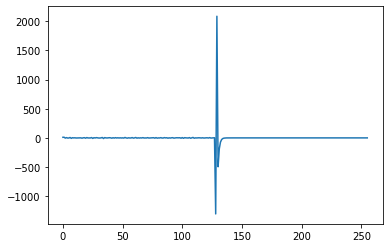

In [6]:
#calcul vitesse
v_mess1=np.gradient(data1)

v_filtr1=np.gradient(kalman_y1)
v_filtr2=np.gradient(kalman_y2)

#plot k
plt.plot(k)

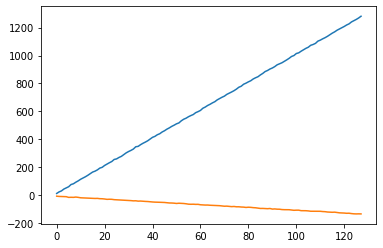

In [7]:
#plot deplacement messuré
plt.plot(data1[0:int(sz/2)])
plt.plot(data1[int(sz/2):sz])

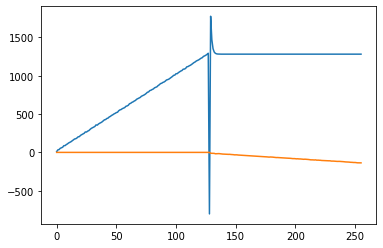

In [8]:
#plot deplacement apres filtre
plt.plot(kalman_y1)
plt.plot(kalman_y2)

NameError: name 'v_mess2' is not defined

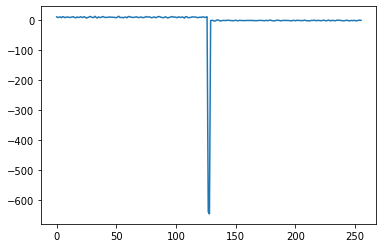

In [9]:
#plot vitesse à partir du deplacement messuré
plt.plot(v_mess1)
plt.plot(v_mess2)

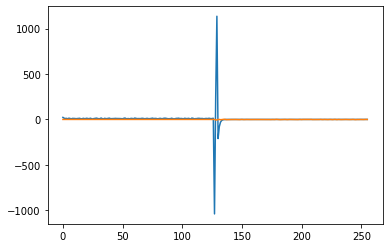

In [10]:
#plot vitesse à partir du deplacement selon filtre
plt.plot(v_filtr1)
plt.plot(v_filtr2)